# Data 311 Final : An exploration into U.S. Voting Patterns and Results

## Yuliya Dominguez, Ben Murrell, Rob Moor

For this project we wanted to inquire about voting in the United States of America. Who participates in voting, what influences outcomes of elections, which groups should politicians target in their campaigns, etc. Our intention was to be able to see and detect underlying structure in the voter data, and find through an in depth analysis what factors are important amongst people that can help determine the outcome of an election, whether it be presidential or congressional.

We looked at and identified trends among different races of voters and compared them against each other, who is more likely to vote, or who in general is voting more. By doing some other investigating on age groups we were able to identify which age groups are more likely to go out and vote, and which age groups are more likely to stay home on election day. Comparisons were made involving numbers of registered voters, and those that actually ended up voting, and the numbers were quite simply dissapointing to say the least.. More evaluations were conducted to identify relationships between voters of all races, and both men and women.

Later in the project there was a model built to predict election results, and then important factors in determining those elections were identified, so we as a collective can have an idea of what it is about the voters in our country, that are most likely to influence an election, and there were a couple surprises in our results. Overall, voting in the United States has many factors, we hoped to try and narrow down what these factors are that not everyone can see, and understand the overall involvement in choosing our governments highest positions. 

# Part 1: Exploratory Analysis of U.S. Historical Reported Voting Rates  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from openpyxl import load_workbook
from openpyxl.worksheet import worksheet

 Here is our data that was collected from the United States Census Bureau regarding voter information. This provides us with data on voter statistics involoving race, sex, ages, and populations of who voted and who was registered to vote in recent elections. These elections include both presidential elections, and congressional elections. Essentially every two years we have data for voters. 

The "Total voting-age population" numbers are in the thousands. So as far as how the numbers read, for the first one it normally reads two hundred fifty two thousand two hundred seventy four, instead this represents two hundred fifty two million... etc. Which makes more sense in terms of the number of people in this country and those who participate in voting.

https://www.census.gov/data/tables/time-series/demo/voting-and-registration/voting-historical-time-series.html

In [2]:
wba = load_workbook(filename = 'a1.xlsx')
wsa = wba['A1']
dataA = wsa.values
dataAcolumns = ["Year", "Total voting-age population", "Total percent, Total population", "Total percent, Citizen population",
               "White, Total population","White, Citizen population","White non-Hispanic, Total population","White non-Hispanic, Citizen population",
               "Black, Total population","Black, Citizen population","Asian, Total population","Asian, Citizen population",
               "Hispanic (any race), Total population","Hispanic (any race), Citizen population","Male, Total population", "Female, Total population","","","",""] 

In [3]:
dfa = pd.DataFrame(wsa.values, columns=dataAcolumns)

In [4]:
for i in range (0,7): dfa = dfa.drop([i])
for j in range (341, 352): dfa = dfa.drop([j])
for k in range (36,40): dfa = dfa.drop([k])
for l in range (69,74): dfa = dfa.drop([l])
for m in range (103,108): dfa = dfa.drop([m])
for n in range (137,142): dfa = dfa.drop([n])
for o in range (171,176): dfa = dfa.drop([o])
for p in range (205,210): dfa = dfa.drop([p])
for q in range (239,244): dfa = dfa.drop([q])
for r in range (273,278): dfa = dfa.drop([r])
for s in range (307,312): dfa = dfa.drop([s])

In [5]:
dfa.dropna(how='all', axis=1, inplace=True)

In the al.xlsx notebook which was used for analysis, some notes were provided by the U.S. Census.

* Prior to 2004, this category ('Asian') was 'Asian and Pacific Islanders', therefore rates are not directly comparable with prior years.  

* Prior to 1996, the CPS did not collect information on citizenship in a uniform way. Estimates for the citizenship population presented in this table prior to 1996 should be interpreted with caution, as they are not directly comparable to estimates from 1996 and after.

* Federal surveys now give respondents the option of reporting more than one race.  Therefore, two basic ways of defining a race group are possible.  A group such as Asian may be defined as those who reported Asian and no other race (the race-alone or single-race concept) or as those who reported Asian regardless of whether they also reported another race (the race-alone-or-in-combination concept).  This table shows data for people who reported they were the single race White and not Hispanic, people who reported the single race Black, and people who reported the single race Asian.  Use of the single-race populations does not imply that it is the preferred method of presenting or analyzing data.

* For information on confidentiality protection, sampling error, nonsampling error, and definitions, see https://www.census.gov/programs-surveys/cps/technical-documentation/complete.2020.html

With these reccomendations presented, we dropped columns that reperesnted years before 2004. This gave us data on the percent of the population who reported a single race, instead of two or more.

In [6]:
dfa = dfa.replace("NA", np.nan)
dfa = dfa.replace(2002, np.nan)
dfa = dfa.replace(2000, np.nan)
dfa = dfa.replace(1998, np.nan)
dfa = dfa.replace(1996, np.nan)
dfa = dfa.replace(1994, np.nan)
dfa = dfa.replace(1992, np.nan)
dfa = dfa.replace(1990, np.nan)

dfa=dfa.dropna()

dfa = dfa.astype({"Year": int, "Total voting-age population": int})
dfa=dfa.reset_index()


Votedlist and Agelist are both lists of classifiers that fit onto the data based on the original way the data was broken up. On the original excel file, there were 8 different tables with two tables for each age group. 

Within those two, one for the percentage of the age population that registered to vote and one for the percentage of that age group who actually voted in the election. 

In [7]:
Votedlist=[0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,
       1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,
       0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1]

Agelist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
           4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]

dfa["Voted (0) Registered (1)"]=Votedlist
dfa["Ages: Total = 0, 18-24=1, 25-44=2, 45-64=3, 65+=4"]=Agelist
voting = dfa.drop(columns=["index"])

In [8]:
voting

Year  Total voting-age population  Total percent, Total population  \
0   2020                       252274                             61.3   
1   2018                       249748                             49.0   
2   2016                       245502                             56.0   
3   2014                       239874                             38.5   
4   2012                       235248                             56.5   
..   ...                          ...                              ...   
85  2012                        42514                             76.9   
86  2010                        38966                             72.5   
87  2008                        37458                             75.0   
88  2006                        35821                             75.4   
89  2004                        34738                             76.9   

    Total percent, Citizen population  White, Total population  \
0                                66.8                     63.7   
1                                53.4                     51.1   
2                                61.4                     58.2   
3                                41.9                     40.3   
4                                61.8                     57.6   
..                                ...                      ...   
85                               79.4                     78.1   
86                               74.9                     74.1   
87                               77.4                     76.9   
88                               78.0                     77.4   
89                               79.3                     78.4   

    White, Citizen population  White non-Hispanic, Total population  \
0                        68.3                                  69.8   
1                        55.0                                  56.5   
2                        62.9                                  64.1   
3                        43.4                                  45.0   
4                        62.2                                  63.0   
..                        ...                                   ...   
85                       80.1                                  80.0   
86                       76.0                                  75.9   
87                       78.8                                  78.9   
88                       79.6                                  79.4   
89                       80.4                                  80.0   

    White non-Hispanic, Citizen population  Black, Total population  \
0                                     70.9                     58.7   
1                                     57.5                     48.0   
2                                     65.3                     55.9   
3                                     45.8                     37.3   
4                                     64.1                     62.0   
..                                     ...                      ...   
85                                    80.9                     78.7   
86                                    76.7                     68.9   
87                                    79.7                     71.9   
88                                    80.4                     67.3   
89                                    81.0                     73.7   

    Black, Citizen population  Asian, Total population  \
0                        62.6                     42.8   
1                        51.1                     28.9   
2                        59.4                     33.9   
3                        39.7                     19.1   
4                        66.2                     31.3   
..                        ...                      ...   
85                       80.5                     49.4   
86                       70.6                     44.8   
87                       74.1                     40.0   
88                       69.3       

This is a breakdown of all the datatypes, we are going to be working strictly with integers and floats, which makes our analysis process clean, no conversions really need to be made to conduct the investigation.

In [9]:
voting.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               90 non-null     int64  
 1   Total voting-age population                        90 non-null     int64  
 2   Total percent, Total population                    90 non-null     float64
 3   Total percent, Citizen population                  90 non-null     float64
 4   White, Total population                            90 non-null     float64
 5   White, Citizen population                          90 non-null     float64
 6   White non-Hispanic, Total population               90 non-null     float64
 7   White non-Hispanic, Citizen population             90 non-null     float64
 8   Black, Total population                            90 non-null     float64
 9   Black, Citiz

Down below we start by plotting different subsets of voters, specifically the ones that we would guess had potentially the most interesting comparisons as others were possibly predictable. We are looking at the Asian citizen population by year, along with Male, Female, and the Hispanic race as well. Each one of these plots looks at each voter type in age groups, and then for each age group it draws a line of best fit and shows the difference curve that takes outliers into account. 

For all of the 4 graphs below there are a few similar trends.

First trend, is that in each year there is a slight increase in numbers of people who registered and voted. Particularly, Graph 1 (Asian citizen population) and Graph 2 (Hispanic citizen population) show noticeable growth in involvement with elections. Graph 3 (Male's citizen population) show the least growth, and it is somewhat expected since male citizens have always been allowed to vote since the first U.S. elections.

Second trend is in the age groups. The relationship between the age groups through all 4 graphs is about the same: the least amount of citizens who registered and voted are in the 18-24 age, which is understandable since 18 is the first time people are allowed to vote. These voters are either not interested enough or perhaps don't know how to. The most active in elections are people ages 65+, followed by the age range 45-64, then 25-44, with total percentages about the mean. Using this relationship we can draw a conclusion that involvement in the elections increases with age. Simply said, the older the person is the more likely they are to vote in the elections.

Third trend, despite the previous conclusion, shows that age group 18-24 becomes more involved with each year: in graphs 2 and 3 where other age groups have roughly a steady slope, the slope for the 18-24 age group is relatively higher. 18-24 year olds are becoming more likely to register and vote, and this trend will most likely continue in future elections.  

Note: datapoints are distributed by years, and there are several datapoints for each age group, one for registered (higher on the graph), and another one for voted (lower in the graph). Our graph shows the line of best fit between the two for each age group.

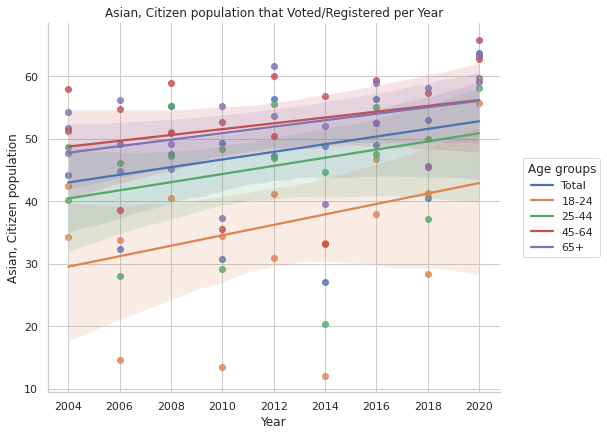

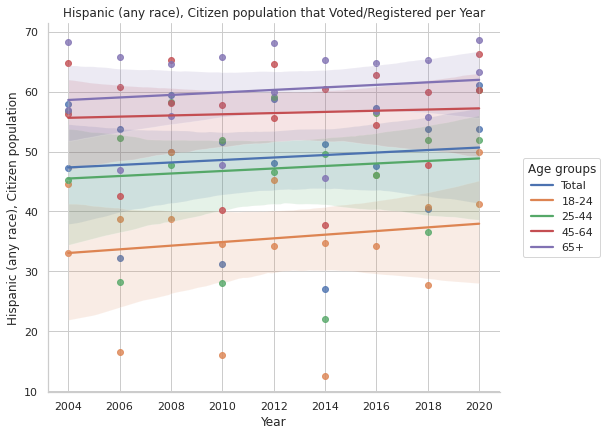

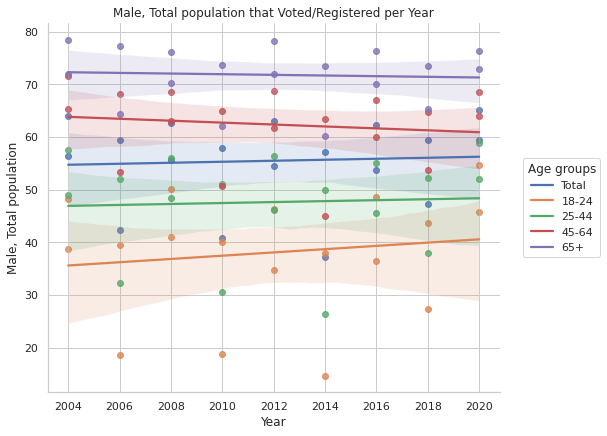

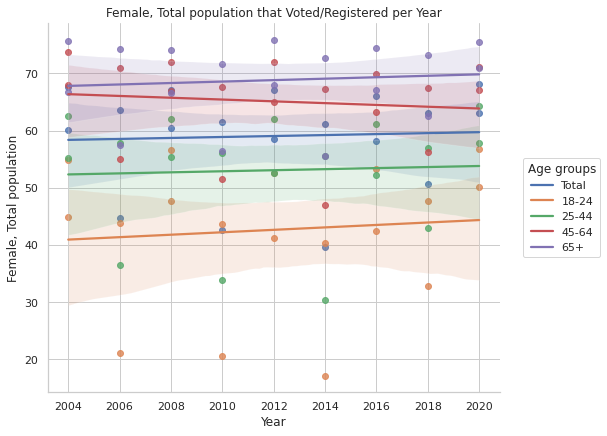

In [10]:
sns.set()
sns.set_style("whitegrid")

y_axis = ["Asian, Citizen population", "Hispanic (any race), Citizen population", "Male, Total population", "Female, Total population"]

for i in range(0,4):
    graph = sns.lmplot(data = voting, x = "Year", y = y_axis[i], 
                       hue  = "Ages: Total = 0, 18-24=1, 25-44=2, 45-64=3, 65+=4", 
                       height = 6, aspect = 1.2, legend = False)
    
    ax = plt.gca()
    ax.set_title(y_axis[i] + " that Voted/Registered per Year")
    plt.legend(title = "Age groups", labels = ["Total", "18-24", "25-44", "45-64", "65+"], bbox_to_anchor = (1.04, 0.5), loc = "center left")
    plt.show(graph)

This particular plot is looking at the female population by year. It appears that the distance between the lines at any point is decreasing by year, therefore it is adequate to say that more female registered voters actually vote with each year. Although, the slope on registration line does not change much, the slope on voting line grows, so more registered females are likely to vote more.

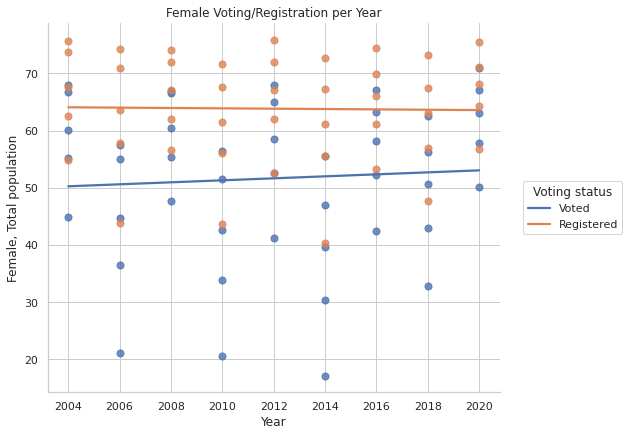

In [11]:
sns.lmplot(x = "Year", y = "Female, Total population", hue = "Voted (0) Registered (1)", 
           data = voting, order=1, ci=None, scatter_kws={"s": 50}, 
           height=6, aspect=1.2, legend = False)

ax = plt.gca()
plt.legend(title = "Voting status", labels = ["Voted", "Registered"], 
           bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.title("Female Voting/Registration per Year")
plt.show()

Here is a visual lineplot that compares the basic number of voters who actually voted against who is registered to vote, this is including all numbers of people, simply the total population. There is a definite gap in voters vs those who are registered, however this is no surprise that less people vote then who are actually eligible.

The lines on graph dip down and go up with intervals of every 4 years. This trend can be explained by the excitement for presidential elections versus just congressional elections. For every presidential election year the lines grow and then they decay in between. It appears that people are generally more interested in the presidential elections than other kinds. The biggest voter turnout over the last 16 years were in 2008 and 2020 (both years were won by Democrats). There also seems to be the smallest gap between numbers of people who voted and registered in 2020 and 2008. That means that every year more registered people actually showed up to vote than other years.

In [12]:
Ages = voting.groupby("Ages: Total = 0, 18-24=1, 25-44=2, 45-64=3, 65+=4")

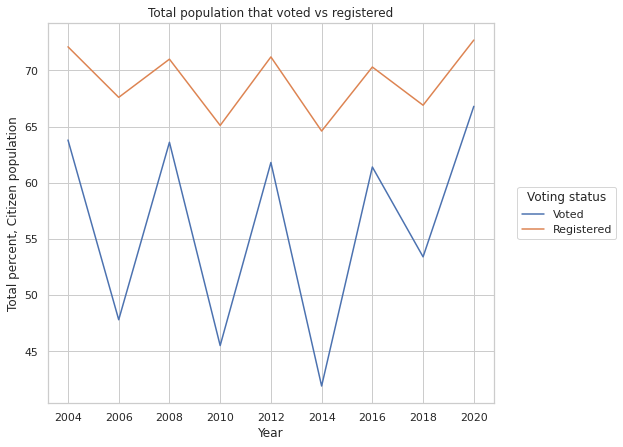

In [13]:
plt.figure(figsize=(8,7))
sns.lineplot(x="Year", y="Total percent, Citizen population", data= Ages.get_group(0), 
             hue ="Voted (0) Registered (1)", legend = False)
ax = plt.gca()
ax.set_title("Total population that voted vs registered")
plt.legend(title = "Voting status", labels = ["Voted", "Registered"], bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.show()

This heatmap provides a representation that shows common values against less common values. In this case we are talking percentages. Basically it tells us the repetitive nature of the percentages and the best relationshop between different columns. Darker colored cells show higher relatioship (ignore 1.0 values as they are correlated with itself). We recommend to rather pay attention to the similarly organized columns (such as, for example, "Black, Citizen population" vs "Asian, Citizen population", instead of comparing total populations to citizen populations of the same race). Also, female and male total population columns will have high correlation with most columns simply because people of all races are labeled either males or females, so we chose not to compare them with other columns besides each other (although, we found it interesting that percent of correlation for females with any column is slightly higher than correlation for males with the same columns). Also its unhelpful to compare correlation of the same race with itself.

A few more things to mention. If comparing correlation between different races, it seems that the best correlation has the column "Hispanic (any race), Citizen population" with both White and Black citizen populations. And the Asian citizen and total population has the least correlation with any race (there is still quite a strong correlation nonetheless, it is just relatively less than other columns). Overall, this table has a potential to show how many racial factors might affect the voter turnout.

In [14]:
corr = voting.drop(["Voted (0) Registered (1)", "Ages: Total = 0, 18-24=1, 25-44=2, 45-64=3, 65+=4", 
                    "Year", "Total voting-age population"], axis = 1)
corr_table = corr.corr()

corr_table.style.background_gradient(cmap='PuRd')

Below are the scatterplots that show the correlations between specific groups of voters. Here we compare White voters vs Black voters, Asian voters against Hispanic voters, White and Hispanic voters, along with male and female voters. There is a linear or possible exponential relationships in all of them, yet some have heavier correlations than others as mentioned above. Such as male and female voters, yet there is less of a correlation in percentage of voters between asian and hispanic.

There will be two scatterplots to go along with each correlation that we show, the first scatterplot that is shown is an overall look at the correlation, if there is any, or what it could possibly look like. The second plot after seeing the first overview, separates into the numbers of registered voters in one color, and the ones who actually voted in another, to give another look at the numbers and see what is actually going on amongst those voter groups, and who is actually voting.

This first scatterplot is looking specifically at the White population of voters, compared to Black citizen voters over the respective time periods that are being evaluated. We can take away from this that there are not actually as many outliers as would have possibly been thought previously, yet there are some that can be noticed towards the middle of the plot. To the right is the second plot for comparing white and black voters, this time we can view the scatter plot with a difference in seeing who was registered to vote, and who actually voted. We can pull from this that generally amongst Black and White voters there were more people that registered to vote, then those who actually voted. And this is a trend that we will continue to see throughout the rest of the evaluations.

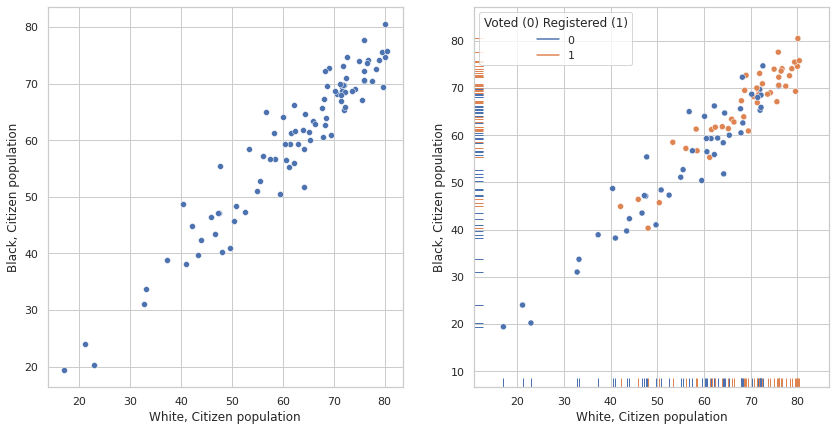

In [15]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (14,7))

sns.scatterplot(x = voting["White, Citizen population"], y = voting["Black, Citizen population"], ax = ax1)
sns.scatterplot(x = voting["White, Citizen population"], y = voting["Black, Citizen population"], hue = voting["Voted (0) Registered (1)"], ax = ax2)
plt.xlabel("White, Citizen population")
plt.ylabel("Black, Citizen population");
sns.rugplot(data=voting, x="White, Citizen population", y="Black, Citizen population", hue="Voted (0) Registered (1)");

Below we are looking at the correlation between the Asian population of voters, and the Hispanic population of voters. There is potential for a linear correlation here, however the number of outliers towards the higher percentages becomes overwhelming. Ultimately we can see that as the numbers continue to increase, we see larger numbers of Asian voters in these elections than we see Hispanic voters, although they are still correlated. The plot to the right shows the number of registered voters against the number of participating voters, there is a larger amount of registered voters versus the amount of actual voters compared to the other groups. 

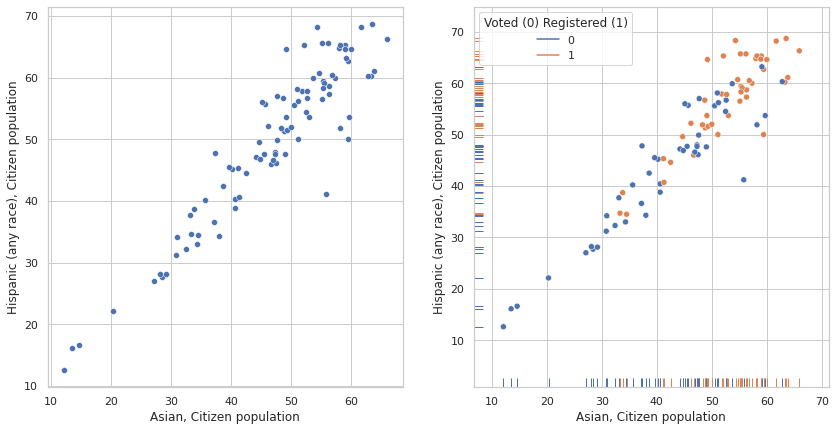

In [16]:
fig2, (ax3,ax4) = plt.subplots(1, 2, figsize = (14,7))
sns.scatterplot(x = voting["Asian, Citizen population"], y = voting["Hispanic (any race), Citizen population"] , ax = ax3)
sns.scatterplot(x = voting["Asian, Citizen population"], y = voting["Hispanic (any race), Citizen population"], hue = voting["Voted (0) Registered (1)"], ax =ax4)
plt.xlabel("Asian, Citizen population")
plt.ylabel("Hispanic (any race), Citizen population");
sns.rugplot(data=voting, x="Asian, Citizen population", y="Hispanic (any race), Citizen population", hue="Voted (0) Registered (1)");

Here the populations of white voters and hispanic voters are being evaluated as well. We begin to see a much stronger correlation between white and hispanic voters, compared to the first couple evaluations. It seems to be off to a little bit slower start, it has a very slight curve, could potentially be seen as exponential, however they are still strongly correlated. In the next scatter plot on the right, we will see how the numbers of registered voters, stacks up with the numbers of people in these columns that actually did participate in the elections. Once again, the number of registered voters is higher then the number of participating voters, continuing the theme that unfortunately, not everyone who is elligible and ready to vote, actually participates in the process. 

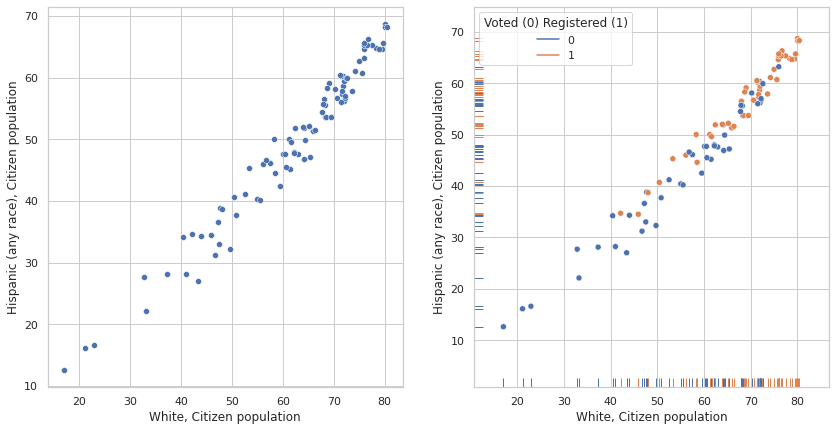

In [17]:
fig3, (ax5,ax6) = plt.subplots(1, 2, figsize = (14,7))
sns.scatterplot(x = voting["White, Citizen population"], y = voting["Hispanic (any race), Citizen population"], ax = ax5)
sns.scatterplot(x = voting["White, Citizen population"], y = voting["Hispanic (any race), Citizen population"], hue = voting["Voted (0) Registered (1)"], ax = ax6)
plt.xlabel("White, Citizen population")
plt.ylabel("Hispanic (any race), Citizen population")
sns.rugplot(data=voting, x="White, Citizen population", y="Hispanic (any race), Citizen population", hue="Voted (0) Registered (1)");

This scatterplot that is seen here is depicting the correlations beween the male and female voting populations, and then the registered voters compared to the actual number of voters for both of these groups. It is noticed that there is a strong connection between male and female voters, which could have been predicted, however there are a few outliers when we get to the 60-70 percent range for the men, the numbers for the women slack just slightly, but then it picks back up shortly after. This seems to be little to no surprise. To the right it can be noted that the number of unregistered voters and actual registered voters is spread out more evenly along the correlation of overall voters, so both men and women are fairly similar when it comes to voters and registered voters with respect to their noted percentages.

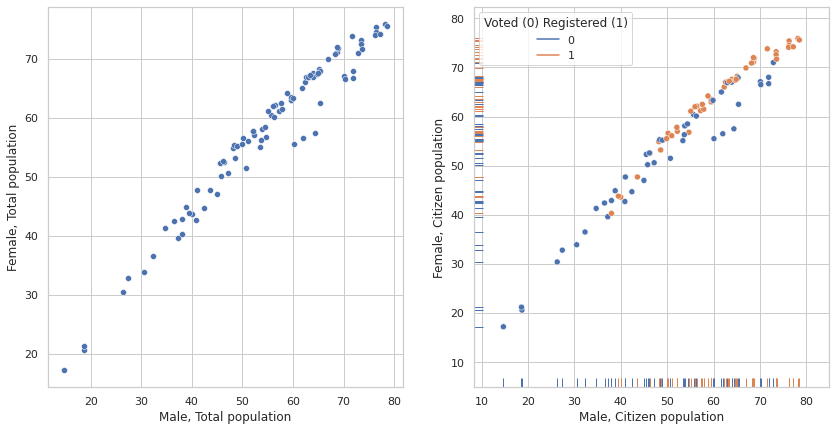

In [18]:
fig4, (ax7,ax8) = plt.subplots(1, 2, figsize = (14,7))
sns.scatterplot(x = voting["Male, Total population"], y = voting["Female, Total population"], ax = ax7)
sns.scatterplot(x = voting["Male, Total population"], y = voting["Female, Total population"], hue = voting["Voted (0) Registered (1)"], ax=ax8)
plt.xlabel("Male, Citizen population")
plt.ylabel("Female, Citizen population")
sns.rugplot(data=voting, x="Male, Total population", y="Female, Total population", hue="Voted (0) Registered (1)");

At last, we wanted to see some distributions of the percentages of voter turnout by races and sex.

The graph right below has all the distributions of observations for all given races from citizen population. It appears that the most voter turnout is among white citizens (as expected) and the voter turnout for black citizens is very similar to white citizens with slightly smaller percentages, but nearly the same distribution curve. Then goes the curve for hispanic citizen population with the most frequent percentage in around 55% and 50% for asian citizens, which appears to have relatively smaller turnout.

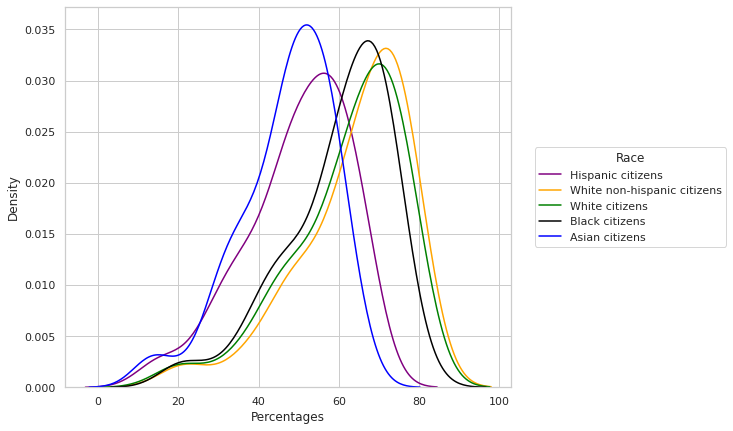

In [19]:
plt.figure(figsize=(8,7))
sns.kdeplot(x=voting["Hispanic (any race), Citizen population"], color="purple")
sns.kdeplot(x=voting["White non-Hispanic, Citizen population"], color="orange")
sns.kdeplot(x=voting["White, Citizen population"], color="green")
sns.kdeplot(x=voting["Black, Citizen population"], color="black")
sns.kdeplot(x=voting["Asian, Citizen population"], color="blue")
plt.xlabel("Percentages")
plt.legend(title = "Race", labels = ["Hispanic citizens", "White non-hispanic citizens", "White citizens", "Black citizens", "Asian citizens"], bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.show()

This graph shows the voter turnout by sex. We tried to group by the "Voted (0) Registered (1)" column and plot the ditribution only for voting population (without registered) but it showed us identical graph with identical distribution.

This graph was the most surprising so far because it shows higher percentages and higher distribution for females while we expected to see this for males (because, as mentioned above, males have been participating in elections since the beginning and females earned this right relatively recently). We can now draw a new conclusion that females vote more frequently and actively than males.

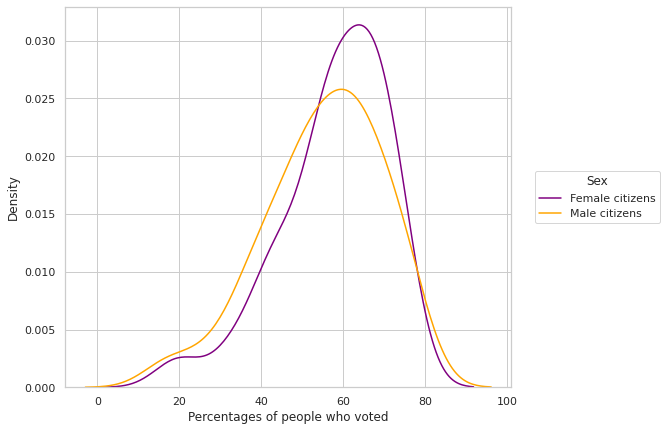

In [20]:
#action = voting.groupby("Voted (0) Registered (1)")
#vote = action.get_group(0)
#register = action.get_group(1)

plt.figure(figsize=(8,7))
sns.kdeplot(x=voting["Female, Total population"], color="purple")
sns.kdeplot(x=voting["Male, Total population"], color="orange")

plt.xlabel("Percentages of people who voted")
plt.legend(title = "Sex", labels = ["Female citizens", "Male citizens"], 
           bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.show()

Our key takeaways from the analysis are:
* There are more registered to vote people than actually the ones' who voted;
* Older people are more involved in elections than younger people;
* Involvement of the youngest age group (18-24) is increasing each year;
* Overall, the interest in elections grows with age;
* Hispanic and Asian populations show noticeable growth in involvement in latest years, although the Asian population is the least involved among other races yet;
* Females, while historically barred from voting, are now more involved with the elections than males;
* White and Black citizen populations have similar distribution of the voter turnout and high correlation with each other, however involvement of the Black citizens is still smaller.

# Part 2: Machine Learning on 2018 Congressional Election Districts

For the machine learning element of our project, we tried not to stray too far from the original data we were exploring. Initially, our idea was to use the bi-yearly election dataset used for exploration for our model. However, our total percent registration data didn't account for the real reasons that people go out to vote. Certain races or age groups will make sure to vote on legislation that impacts them, not just nationally but at a lower level. So for our machine learning element of the project, we found a dataset still from the U.S. census website, but broken up into districts of each state. Our prediction task is about if we can predict the party outcome in a district based on the population factors like education, age, gender and race. This dataset included just information from the 2018 congressional election, and other years worth of data were not available on the U.S. Census website.

In [21]:
import sklearn

from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from openpyxl import load_workbook
from openpyxl.worksheet import worksheet
import warnings
warnings.filterwarnings('ignore')

Openpyxl was required to open and use the excel spreadsheets. To learn more about openpyxl, follow this link:

https://openpyxl.readthedocs.io/en/stable/

Here, we have the website in which we collected our data:
https://www.census.gov/data/tables/time-series/demo/voting-and-registration/congressional-voting-tables.html

Below is the process of cleaning the dataframes. There were margin of error and percent of total columns for every population based statistic, which when scaled should all be about the same for each statistic column, so those were dropped in a later cell.  

In [22]:
wba = load_workbook(filename = 'table02a.xlsx')
wsa = wba['Table 2A']
dataA = wsa.values
dataAcolumns = ["Line", "State abbreviation","State name","Congressional district","Citizen voting-age population", "MOE",
 "18-29","Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "30-44","Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "45-64", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "65 years old and older", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)"] 
for i in range (22,70): dataAcolumns.append("")

wbb = load_workbook(filename = 'table02b.xlsx')
wsb = wbb['Table2B']
dataB = wsb.values
dataBcolumns = ["Line", "State abbreviation","State name","Congressional district","Citizen voting-age population", "MOE",
 "Men","Margin of error (MOE)1", "Percent of total1", "Percent of total margin of error (MOE)1",
 "Women","Margin of error (MOE)1", "Percent of total1", "Percent of total margin of error (MOE)1",
 "Margin of error (MOE)1", "Margin of error (MOE)1", "Margin of error (MOE)1", "Margin of error (MOE)1", "Percent of total Poverty", "Percent of total Moe"]
for i in range (20,31): dataBcolumns.append("")
    
wbc = load_workbook(filename = 'table02c.xlsx')
wsc = wbc['Table2C']
dataC = wsc.values
dataCcolumns = ["Line", "State abbreviation","State name","Congressional district","Citizen voting-age population", "MOE",
 "Less9th","Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "9-12NoDiploma","Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "HSGrad", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "SomeCollege", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "Associates", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "Bachelors", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "Graduate", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "HSorMore", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "BachorMore", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)", ""]

wbd = load_workbook(filename = 'table02d.xlsx')
wsd = wbd['Table2D']
dataD = wsd.values
dataDcolumns = ["Line", "State abbreviation","State name","Congressional district","Citizen voting-age population", "MOE",
 "White","Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "Black","Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "Asian", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "AmericanIndian", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "nativeHawaiian", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "Other", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "TwoOrMore", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "Hispanic", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)",
 "WhiteNon-Hisp", "Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)"]

dfa = pd.DataFrame(wsa.values, columns=dataAcolumns)
dfb = pd.DataFrame(wsb.values, columns=dataBcolumns)
dfc = pd.DataFrame(wsc.values, columns=dataCcolumns)
dfd = pd.DataFrame(wsd.values, columns=dataDcolumns)

In [23]:
for i in range (0,5): dfa = dfa.drop([i])
for j in range (441, 447): dfa = dfa.drop([j])
dfa.dropna(how='all', axis=1, inplace=True)

for i in range (0,5): dfb = dfb.drop([i])
for j in range (441, 448): dfb = dfb.drop([j])
dfb.dropna(how='all', axis=1, inplace=True)

for i in range (0,5): dfc = dfc.drop([i])
for j in range (441, 447): dfc = dfc.drop([j])
dfc.dropna(how='all', axis=1, inplace=True)

for i in range (0,5): dfd = dfd.drop([i])
for j in range (441, 451): dfd = dfd.drop([j])
dfd.dropna(how='all', axis=1, inplace=True)

In [24]:
dfa = dfa.drop(columns = ["Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)"])
dfb = dfb.drop(columns = [ "State abbreviation","State name","Congressional district","Citizen voting-age population", "MOE","Margin of error (MOE)1", "Percent of total1", "Percent of total margin of error (MOE)1"])
dfc = dfc.drop(columns = [ "State abbreviation","State name","Congressional district","Citizen voting-age population", "MOE","Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)"])
dfd = dfd.drop(columns = ["AmericanIndian","nativeHawaiian", "State abbreviation","State name","Congressional district","Citizen voting-age population", "MOE","Margin of error (MOE)", "Percent of total", "Percent of total margin of error (MOE)"])

In the last cell, we also regrettably had to drop the columns American Indian and Native Hawaiian as many states did not have any data for the column. Putting zeros into the column instead caused our models to overfit and thus they were dropped.

In [25]:
dfstep1 = dfa.merge(dfb)
dfstep2 = dfstep1.merge(dfc)
df = dfstep2.merge(dfd)
df = df.drop(columns=["Line","State name","Percent of total Moe"])
df = df.replace("N", np.nan)
df = df.replace("At-large", 0)

Our prediction task is about if we can predict the party outcome in a district based on the population factors like education, age, gender and race. To check our predictions and train our models, we needed the outcomes of the 2018 election which were found from the data provided at this link from the MIT election lab:

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/IG0UN2

We also ended up taking the 2016 data for a baseline, which will be mentioned later.

In [26]:
housedf = pd.read_csv("1976-2020-house.csv")

In [27]:
housegroup=housedf.groupby(by =["year"])
houseresults2018 = housegroup.get_group(2018)

In [28]:
housemerge = houseresults2018[['state_po', 'district', 'party','candidatevotes',"unofficial"]].copy()

for i in range (29586, 29636): housemerge = housemerge.drop(i)
h = housemerge.groupby(["state_po","district"])

In [29]:
partylist =[]
districtlist=[]
Statelist=[]
for name, group in h:
    partylist.append(h.get_group(name).sort_values('candidatevotes', ascending = False).iloc[:1]["party"].iloc[0])
    Statelist.append(h.get_group(name).sort_values('candidatevotes', ascending = False).iloc[:1]["state_po"].iloc[0])
    districtlist.append(h.get_group(name).sort_values('candidatevotes', ascending = False).iloc[:1]["district"].iloc[0])

In [30]:
data={'Party':partylist , "State abbreviation":Statelist, "Congressional district": districtlist}
mdf = pd.DataFrame(data=data)

In [31]:
MLdf = mdf.merge(df)
MLdf= MLdf.dropna()

To make the classification work, this indentification was used:

* If the winning member of the 2018 House Congressional Election for the district was a Democrat, they were given a 0.
* If the winning member of the 2018 House Congressional Election for the district was a Republican, they were given a 1.
* If the winning member of the 2018 House Congressional Election for the district was a Democrat-Farmer-Labor, they were given a 0.

In [32]:
X = MLdf.drop(columns=["MOE","Party","State abbreviation", "Congressional district"]) 
Y = MLdf.iloc[:,0]
Y = Y.replace("REPUBLICAN", 1)
Y = Y.replace("DEMOCRAT", 0)
Y = Y.replace("DEMOCRATIC-FARMER-LABOR", 0)

Next, we split the data with a training size of 70% of the available data and 15% for both validation and testing.

In [33]:
311_FinalProject_Voting.ipynbXtr, Xnext , Ytr ,Ynext = sklearn.model_selection.train_test_split(X , Y, random_state = 28, train_size = .7)
Xva , Xtest, Yva, Ytest = sklearn.model_selection.train_test_split(Xnext , Ynext, random_state = 28, train_size = .5)

After trying both a robust and standard scaler, our standard scaler worked better on our small(ish) amount of data.

In [34]:
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xva = scaler.transform(Xva)
Xtest = scaler.transform(Xtest)

For our baseline, we used the 2016 election results of the congressional house. This does have some issues, as then population makeup in each district changes over time. In addition, if new seats were added to the house in specific states where the population had grown, the 2016 dataset wouldn't account for those new seats. Lastly, 2016 was a presidential election year, and thus we would normally see a larger voter turnout as explained in the exploratory portion of the writeup. All that being said, the proportions of the population living in one state versus the next shouldn't have major fluxations over two years. A new seat was added to the house but luckily for us, that data included NaNs which were thrown out when cleaning and preprocessing the data. The same random state was used in both of the splits to insure a lack of randomness.

In [35]:
houseresults2016 = housegroup.get_group(2016)

blhousemerge = houseresults2016[['state_po', 'district', 'party','candidatevotes',"unofficial"]].copy()

hbl = blhousemerge.groupby(["state_po","district"])

blpartylist =[]
bldistrictlist=[]
blStatelist=[]
for name, group in hbl:
    blpartylist.append(hbl.get_group(name).sort_values('candidatevotes', ascending = False).iloc[:1]["party"].iloc[0])
    blStatelist.append(hbl.get_group(name).sort_values('candidatevotes', ascending = False).iloc[:1]["state_po"].iloc[0])
    bldistrictlist.append(hbl.get_group(name).sort_values('candidatevotes', ascending = False).iloc[:1]["district"].iloc[0])

bldata={'Party':blpartylist , "State abbreviation":blStatelist, "Congressional district": bldistrictlist}
bldf = pd.DataFrame(data=bldata)
bldf = bldf.merge(MLdf, on = ("State abbreviation","Congressional district"))
YBL = bldf.iloc[:,0]
YBL = YBL.replace("REPUBLICAN", 1)
YBL = YBL.replace("DEMOCRAT", 0)

BXtr, BXnext , BYtr ,BYnext = sklearn.model_selection.train_test_split(X , YBL, random_state = 28, train_size = .7)
BXva , BXtest, BYva, BYtest = sklearn.model_selection.train_test_split(BXnext , BYnext, random_state = 28, train_size = .5)

Below is the evaluation environment, adapted from: https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_21f/lectures/L36/L36.html

The environment predicts the outputs based on X Train and X Validation as well as grabbing the model outputs based on the classifier passed into the function. Show eval returns a confusion matrix based on the True Positive/False Positive/ True Negative/ False Negative diagram, as well as  a dataframe with rows Training accuracy, Val Accuracy and more.

In [36]:
def run_eval(clf, Xtr, Ytr, Xva, Yva):
    def model_outputs(clf, X):
        if hasattr(clf, "decision_function"):
            return clf.decision_function(X)
        else:
            return clf.predict_proba(X)
        
    Ytr_pred = clf.predict(Xtr)
    Yva_pred = clf.predict(Xva)
    
    train_out = model_outputs(clf, Xtr)
    val_out = model_outputs(clf, Xva)
    
    return (Ytr_pred, Yva_pred, train_out, val_out)

def show_eval(eval_results, Ytr, Yva):
    
    (Ytr_pred, Yva_pred, train_out, val_out) = eval_results
    
    cmap = sns.color_palette("flare", as_cmap=True)
    confusion = confusion_matrix(Yva, Yva_pred)
    cf=ConfusionMatrixDisplay(confusion)
    cf.plot(cmap=cmap)
    
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None)
    plt.grid(False)
    plt.show()

    return pd.DataFrame([
        ["Train Accuracy", (accuracy_score(Ytr, Ytr_pred))],
        ["Val Accuracy", accuracy_score(Yva, Yva_pred)],
        ["Best Estimator",grid.best_estimator_],
        ["Best Score",grid.best_score_],
        ["Best Paramaters",grid.best_params_]]
        ).rename(columns={1: "Coeff"})

To find the best hyperparameters for our models, we used a grid search. Below are the two dictionaries used in that grid search, one for parameters and the other for the classifiers.

In [37]:
paramsLR = {'C':[75,100,150,200], "max_iter":[10000,100000]}
paramsSVM = {'gamma':["scale","auto"],'kernel':['linear',"rbf"], 'C':[.001,.01,.1,1,10,100]}
paramsDT = {'max_depth':[3,4,5,10]}
paramsNN = {'hidden_layer_sizes':[(1,1),(5, 5),(10,10),(15,15)], 'alpha':[.00001,.0001], "max_iter":[10000,100000], "random_state":[25]}
paramsNB = {}

In [38]:
classifiers = {
    "Logistic Regression": (LogisticRegression(),paramsLR),
    "RBF SVM": (SVC(),paramsSVM),
    "Decision Tree": (DecisionTreeClassifier(),paramsDT),
    "Neural Network": (MLPClassifier(),paramsNN),
    "Naive Bayes": (GaussianNB(),paramsNB)
}

In the box below, by looping through the classifiers and fitting each of them to the training data, we can evaluate and compare our models to find the best one.

LogisticRegression() Confusion Matrix


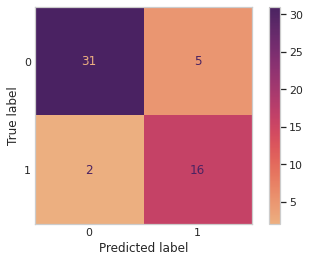

0                                     Coeff
0   Train Accuracy                                  0.826087
1     Val Accuracy                                   0.87037
2   Best Estimator  LogisticRegression(C=75, max_iter=10000)
3       Best Score                                  0.786196
4  Best Paramaters              {'C': 75, 'max_iter': 10000}



SVC() Confusion Matrix


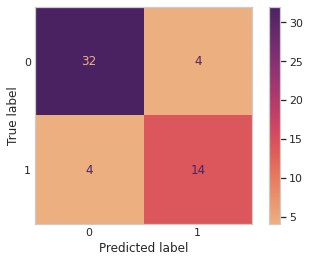

0                                        Coeff
0   Train Accuracy                                     0.869565
1     Val Accuracy                                     0.851852
2   Best Estimator                                     SVC(C=1)
3       Best Score                                      0.81451
4  Best Paramaters  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}



DecisionTreeClassifier() Confusion Matrix


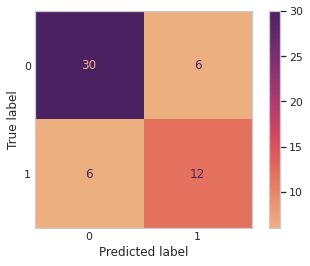

0                                Coeff
0   Train Accuracy                             0.885375
1     Val Accuracy                             0.777778
2   Best Estimator  DecisionTreeClassifier(max_depth=4)
3       Best Score                             0.715843
4  Best Paramaters                     {'max_depth': 4}



MLPClassifier() Confusion Matrix


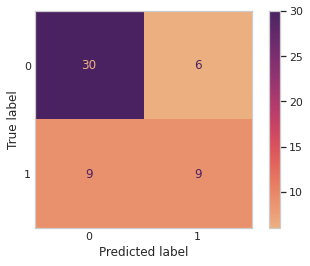

0                                              Coeff
0   Train Accuracy                                           0.996047
1     Val Accuracy                                           0.722222
2   Best Estimator  MLPClassifier(alpha=1e-05, hidden_layer_sizes=...
3       Best Score                                           0.806353
4  Best Paramaters  {'alpha': 1e-05, 'hidden_layer_sizes': (10, 10...



GaussianNB() Confusion Matrix


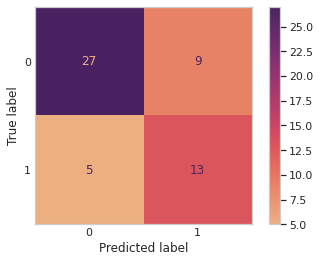

0         Coeff
0   Train Accuracy      0.750988
1     Val Accuracy      0.740741
2   Best Estimator  GaussianNB()
3       Best Score       0.75098
4  Best Paramaters            {}

In [39]:
for key in classifiers:
    clf = classifiers[key][0]
    params = classifiers[key][1]
    
    grid = GridSearchCV(clf, params)
    grid.fit(Xtr, Ytr)
    
    eval_results = run_eval(grid, Xtr, Ytr, Xva, Yva)
    print(str(clf) + " Confusion Matrix")
    display(show_eval(eval_results, Ytr, Yva))
    print("\n")

The confusion matrix top right and bottom left cells account for the mistaken predictions each model makes. The top left and bottom right are the correct predictions.

In each of the 5 models we can see something different:

* Our Logistic Regression has a better validation score than training score, which means our model is actually slightly underfitted, instead of the more common overfit we will see in the next models. 
* The SVC Regression is slightly overfit, but comes in with the highest training accuracy that isn't wildly overfit. It also has a balance of False Negative and Positives, showing we aren't messing up on a specific group in our data.
* Our decision tree classifier seems to work well on True Democrat results, but severely struggles on the Rebuplican elections. This seems to be a common theme over the data, but the Democrats did overall have more seats won in 2018, so the split makes a certian amount of sense.
* Our Neural Network overfits extremely hard and is punished so. Neural networks tend to work better on larger sets of data, and with a  smaller set, this seems to make sense.
* The Gaussian Naive Bayes model seemed to work the least best, though it's Training accuracy and Validation accuracy seemed to be close. Possible overfitting on the data, but a lower validation score than most others shows it wasn't meant to be.

Below, we can now see the results of our baseline, to judge our models on. The baseline came up with no false Republican predictions, something that no other models seemed to do. The overall fitting of the data surprised us as normally party status from election to election tends to stay the same, but our model didn't perform in the 90% range like we were expecting. 

       Baseline Confusion Matrix


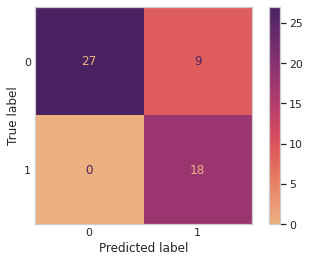

0         Coeff
0   Train Accuracy      0.869565
1     Val Accuracy      0.833333
2   Best Estimator  GaussianNB()
3       Best Score       0.75098
4  Best Paramaters            {}

In [40]:
print("       Baseline Confusion Matrix")
show_eval((BYtr, BYva, Xtr, Xva), Ytr, Yva)

Finally, we chose the Logistic regression based on the fact it wasn't overfit and was reasonably accurate. Other models had better training accuracy or best scores, but seeing as our model fit the validation data the best, we hoped that the same could be said for the testing data.

Regression Score (Test) = 0.8363636363636363
Roots mean squared error (Test)= 0.40451991747794525


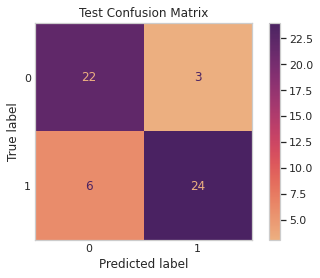

In [41]:
finalreg = LogisticRegression(C=75,max_iter=10000)
finalreg.fit(Xtr,Ytr)
final_pred=finalreg.predict(Xtest)

Ytestlist=[]
for i in range (len(Ytest)):
    Ytestlist.append(Ytest.iloc[i])

final_df = pd.DataFrame(final_pred,columns = ["Prediction"])
Yfinal_df = pd.DataFrame(Ytestlist,columns = ["Y True Value"])
final_df["True Value"] =  Yfinal_df["Y True Value"]

regscore_t=finalreg.score(Xtest, Ytest, sample_weight=None)
rmse_t = mean_squared_error(Ytest, final_pred, squared=False)

print("Regression Score (Test) = " + str(regscore_t))

print("Roots mean squared error (Test)= " + str(rmse_t))
cmap = sns.color_palette("flare", as_cmap=True)
fconfusion = confusion_matrix(Ytest, final_pred)
finalcf=ConfusionMatrixDisplay(fconfusion)
finalcf.plot(cmap=cmap);
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.grid(False)
plt.title("Test Confusion Matrix")
plt.show()

Our final regression score for our test data ended up higher than the baseline (Valdation of 83.33%), at 83.63%, which was very close to the validation data we initially saw as well. What's interesting is that when we take a look at the way our data was split, our testing data had one more row than our validation data, so our model performed better than the baseline by one single row. It's worth taking away from this model that guessing the previous year's results would get you about the same results as the model. 

From here, we could break down the factors that cause these splits into coefficients, plotted below. First, we did an overall look at the coefficients to see which areas impacted our model most, then grouped the coefficients to see which in their respective groups was the most important. 

In [42]:
coefflist=[]
for i in range (0,len(X.columns)):
    coefflist.append(X.columns[i])

coeff_df = pd.DataFrame(finalreg.coef_[0], columns=['Coefficient'])
coeff_df["Features"]=coefflist
grouplist = [0,1,1,1,1,2,2,3,4,4,4,4,4,4,4,5,5,6,6,6,6,6,6,6]
coeff_df["Group"]=grouplist
coeff_df["Coefficient"]=coeff_df["Coefficient"].abs()
coeff_df=coeff_df.sort_values(by = ["Coefficient"],ascending = True)

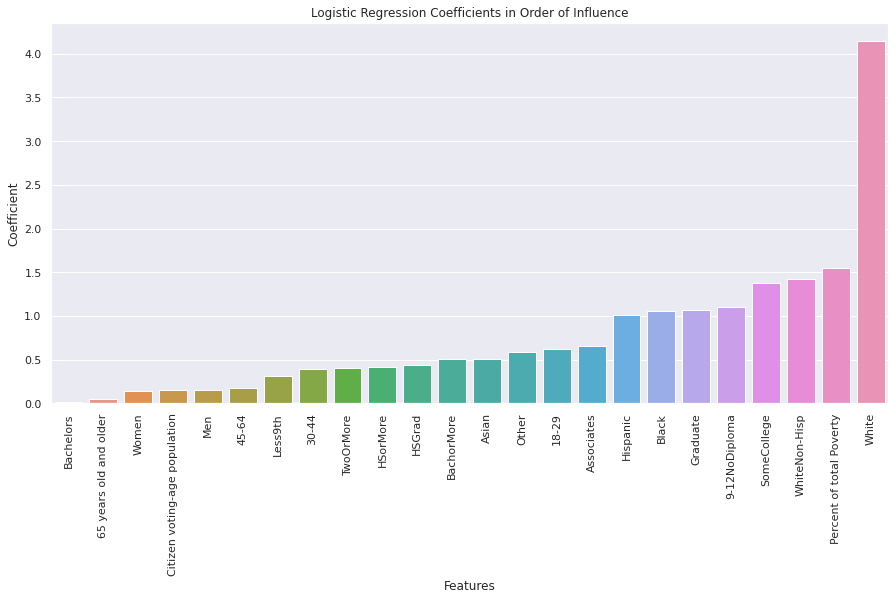

In [43]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data=coeff_df, x="Features", y = "Coefficient")
plt.title("Logistic Regression Coefficients in Order of Influence")
plt.xticks(rotation = 90);

As we can see from the graph above, White, Percent Poverty in the district, and White Non-Hispanic were the three largest coefficients that impacted our data. Two of the top three coefficients are Race based showing that for our specific model, the factors based on race proved to be essential in turning the tide in either party's favor. The other large coefficient being poverty percentage, a surprising result as we thought that top 3 would all be race based.

              Coefficients by Age, Gender, Education, and Race


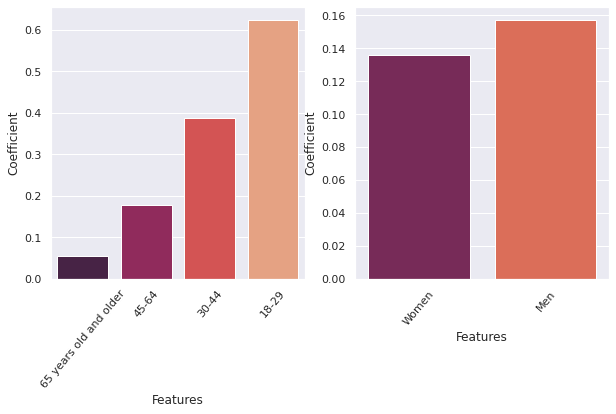

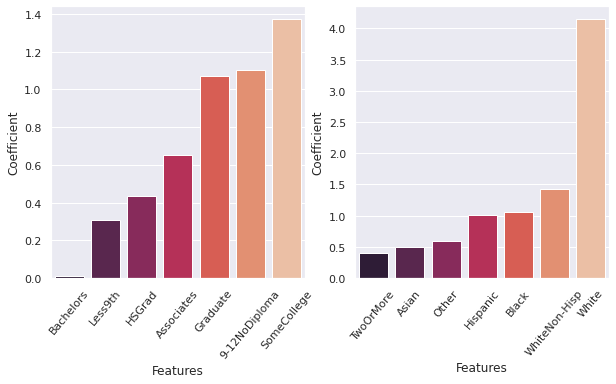

In [44]:
coeffgroups = coeff_df.groupby(["Group"])
sns.set(rc={'figure.figsize':(10,5)})

print("              Coefficients by Age, Gender, Education, and Race") 
for i in (1,4): 
    coeffdfloop=coeffgroups.get_group(i)
    coeffdfloop["Coefficient"]=coeffdfloop["Coefficient"].abs()
    coeffdfloop=coeffdfloop.sort_values(by = ["Coefficient"],ascending = True)
    
    fig, (ax1,ax2) = plt.subplots(1,2)
   
    sns.barplot(data=coeffdfloop, x="Features", y = "Coefficient", ax = ax1, palette = "rocket")
    
    if i == 1 : 
        coeffdfloop=coeffgroups.get_group(i+1)
        coeffdfloop["Coefficient"]=coeffdfloop["Coefficient"].abs()
        coeffdfloop=coeffdfloop.sort_values(by = ["Coefficient"],ascending = True)
    
    else: 
        coeffdfloop=coeffgroups.get_group(i+2)
        coeffdfloop["Coefficient"]=coeffdfloop["Coefficient"].abs()
        coeffdfloop=coeffdfloop.sort_values(by = ["Coefficient"],ascending = True)
    
    sns.barplot(data=coeffdfloop, x="Features", y = "Coefficient", ax = ax2, palette = "rocket")
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=50)
    plt.show();

In indiviual groups, we can see that:

* Young voters seemed to sway our model. As our analysis earlier proved, voters of younger ages are coming out to elections more often. These younger groups have a larger impact than the impact of a greater population of older individuals coming to vote.
* Men and women had surprsingly equal coefficients, and both are realtively small. Men and women's coefficients are both bottom 5 in overall importance, showing a hopeful trend for at least our model. Your vote should count the same as any other individual, no matter your gender.  
* College Graduates and up played a smaller factor than expected, and overall the education splits were wildly different. Individuals with some college or no high school diploma seem to be a massively important base in our model that needs to be won by candidates. 
* White voters, as previously mentioned, seemed to sway the party results the  most. Race seems to be our most important coefficient, but the white voting population has over twice the sway in our model to affect an election outcome to a certian party's favor.